In [48]:
!cp -r /Users/henishmangukiya/Downloads/CS_project/Dataset/ICUDatasetProcessed .

In [49]:
import numpy as np  
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [50]:
dataframe1 = pd.read_csv('/Users/henishmangukiya/Downloads/CS_project/Dataset/ICUDatasetProcessed/environmentMonitoring.csv')
dataframe1.columns

Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta',
       'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn',
       'tcp.flags.urg', 'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size',
       'tcp.window_size_value', 'tcp.checksum', 'mqtt.clientid',
       'mqtt.clientid_len', 'mqtt.conack.flags', 'mqtt.conack.val',
       'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved',
       'mqtt.conflag.retain', 'mqtt.conflag.willflag', 'mqtt.conflags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg',
       'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.topic',
       'mqtt.topic_len', 'mqtt.ver', 'mqtt.willmsg_len', 'ip.proto', 'ip.ttl',
       'class', 'label'],
      dtype='object')

In [51]:
import os
path = 'ICUDatasetProcessed/'
csvs = os.listdir(path)
csvs

['Attack.csv', 'environmentMonitoring.csv', 'patientMonitoring.csv']

In [52]:
import pandas as pd

dataframe1 = pd.DataFrame()

for csv in csvs:
  print(f'---- Reading {csv} ----')
  dataframe = pd.read_csv(path+csv, low_memory=False)
  print(f'dataframe.shape: {dataframe.shape}')
  empty_cols = [col for col in dataframe.columns if dataframe[col].isnull().all()]
  print(f'empty_cols: {len(empty_cols)}')
  print(empty_cols)
  dataframe.fillna(0, inplace=True)
  dataframe1 = pd.concat([dataframe1, dataframe], ignore_index=True)
  print(f'dataframe1.shape: {dataframe1.shape}')

---- Reading Attack.csv ----
dataframe.shape: (80126, 52)
empty_cols: 0
[]
dataframe1.shape: (80126, 52)
---- Reading environmentMonitoring.csv ----
dataframe.shape: (31758, 52)
empty_cols: 0
[]
dataframe1.shape: (111884, 52)
---- Reading patientMonitoring.csv ----
dataframe.shape: (76810, 52)
empty_cols: 0
[]
dataframe1.shape: (188694, 52)


In [53]:
feats = ['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport','mqtt.topic', 'mqtt.msg', 'tcp.payload','mqtt.clientid', 'mqtt.conflags', 'mqtt.conack.flags', 'class']

In [54]:
dataframe1.drop(labels=feats, axis=1, inplace=True)
dataframe1.shape

(188694, 41)

In [67]:
feature_sel_1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 
        'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl', 'label']
feature_sel_2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver', 'label']

In [68]:
dataframe1 = dataframe1[feature_sel_2]
dataframe1.shape

(188694, 11)

In [69]:
dataframe1['label'].value_counts()

label
0    108568
1     80126
Name: count, dtype: int64

In [70]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

dataframe1['mqtt.hdrflags']= label_encoder.fit_transform(dataframe1['mqtt.hdrflags'])



In [71]:
X_train, X_test, y_train, y_test = train_test_split( dataframe1.drop(labels=['label'], axis=1), dataframe1['label'], 
                                                                            test_size=0.3, random_state=100)

In [72]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

print('---------- SelectFromModel LogisticRegression -----------')
embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
                                      max_features = 10)
embeded_LR_selector.fit(X_train, y_train)
embeded_LR_support = embeded_LR_selector.get_support()
print('embeded_LR_support',embeded_LR_support)

embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

print(len(embeded_LR_feature), 'selected features')
print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [False  True  True  True False False False  True  True False]
5 selected features
embeded_LR_features:  ['tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'mqtt.qos', 'mqtt.retain']


In [61]:
feature_sel_1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl']
feature_sel_2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [63]:

print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnbPred = gnb.predict(X_test) 


print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
knnPred = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=50, random_state=100)  
RF.fit(X_train, y_train)
rfPred = RF.predict(X_test)


print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
abPred = AB.predict(X_test)


print('--------Applying LogisticRegression Classifier ----------')
#LogR = LogisticRegression()
LogR = linear_model.LogisticRegression()
LogR.fit(X_train, y_train)
logRPred = LogR.predict(X_test)


print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=50, min_samples_leaf=10)
DT.fit(X_train, y_train)
dtPred = DT.predict(X_test)


--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


/Users/henishmangukiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print('       Performance Evaluation       ')
#getting performence evaluation based on precision_score, recall_score, f1_score, accuracy_score
_res = []
selector = 'LR'
_res.append((selector,'','', '',''))
_res.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
_res.append(('NB ', accuracy_score(y_test,  gnbPred)*100,
                precision_score(y_test,  gnbPred)*100,
                recall_score(y_test,  gnbPred)*100,
                f1_score(y_test,  gnbPred)*100))
_res.append(('KNN ', accuracy_score(y_test, knnPred)*100,
                precision_score(y_test, knnPred)*100,
                recall_score(y_test, knnPred)*100,
                f1_score(y_test, knnPred)*100))
_res.append(('RF ', accuracy_score(y_test,  rfPred)*100,
                precision_score(y_test,  rfPred)*100,
                recall_score(y_test,  rfPred)*100,
                f1_score(y_test,  rfPred)*100))
_res.append(('AB ', accuracy_score(y_test,  abPred)*100,
                precision_score(y_test,  abPred)*100,
                recall_score(y_test,  abPred)*100,
                f1_score(y_test,  abPred)*100))
_res.append(('LogR ', accuracy_score(y_test,  logRPred)*100,
                precision_score(y_test,  logRPred)*100,
                recall_score(y_test,  logRPred)*100,
                f1_score(y_test,  logRPred)*100))
_res.append(('DT ', accuracy_score(y_test,  dtPred)*100,
                precision_score(y_test,  dtPred)*100,
                recall_score(y_test,  dtPred)*100,
                f1_score(y_test,  dtPred)*100))

print('type(_res): ', type(_res))
print('results: ', _res)
dataframe_res = pd.DataFrame(_res)
print('type(dataframe_res): ', type(dataframe_res))
print('dataframe_res: ', dataframe_res)

       Performance Evaluation       
type(_res):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('NB ', 79.67107703722023, 99.705296694544, 52.18225019800742, 68.50919439579684), ('KNN ', 99.64669928809906, 99.69916015543392, 99.4664221101338, 99.58265514794876), ('RF ', 99.6996943948842, 99.71613441870173, 99.57480511901288, 99.64541965626563), ('AB ', 99.55484110300482, 99.4459025955089, 99.50393930551503, 99.47491248541424), ('LogR ', 95.28696850324152, 90.35164086452932, 99.50393930551503, 94.70718933502619), ('DT ', 99.66966383437263, 99.75334448160535, 99.4664221101338, 99.60967667870338)]
type(dataframe_res):  <class 'pandas.core.frame.DataFrame'>
dataframe_res:              0          1          2          3          4
0          LR                                            
1  Classifier   Accurary  Precision     Recall   F1-Score
2         NB   79.671077  99.705297   52.18225  68.509194
3        KNN   99.6466

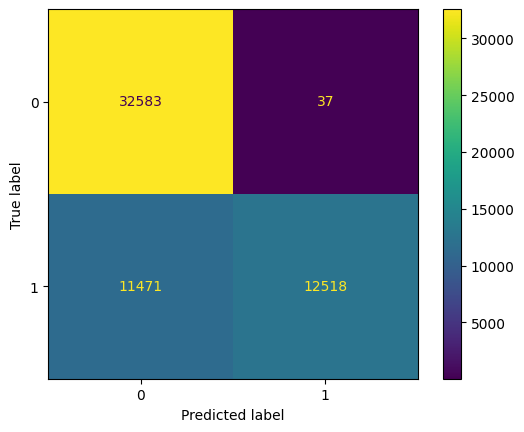

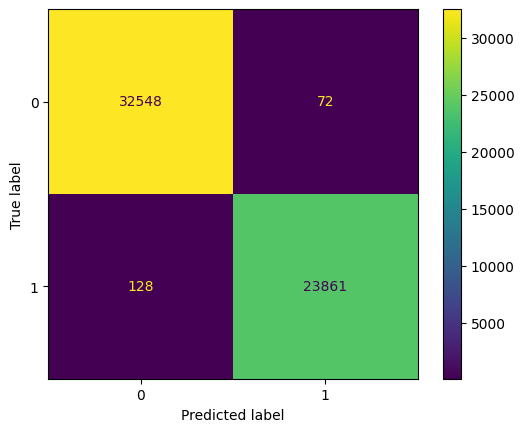

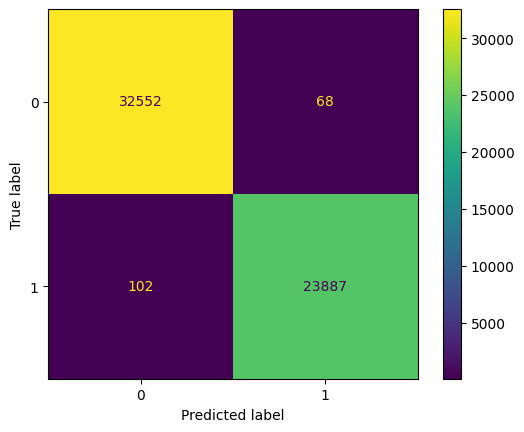

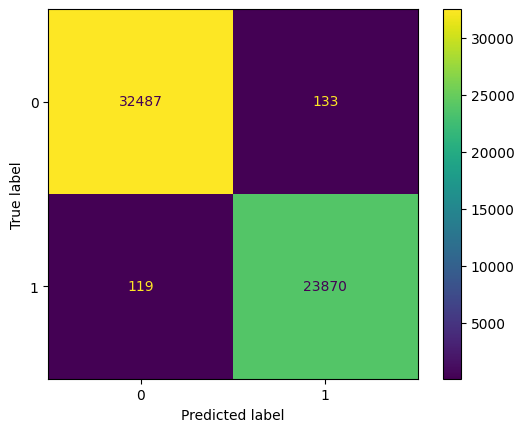

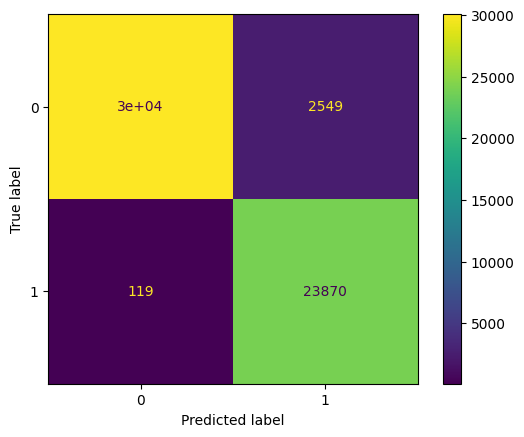

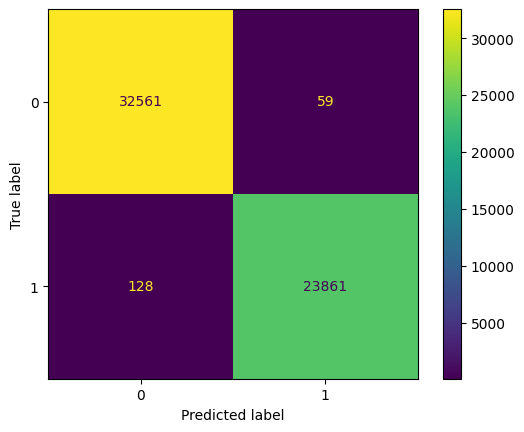

In [66]:
confMat = confusion_matrix(y_test,gnbPred)
confMat_dis = ConfusionMatrixDisplay(confMat).plot()

confMat = confusion_matrix(y_test,knnPred)
confMat_dis = ConfusionMatrixDisplay(confMat).plot()

confMat = confusion_matrix(y_test,rfPred)
confMat_dis = ConfusionMatrixDisplay(confMat).plot()

confMat = confusion_matrix(y_test,abPred)
confMat_dis = ConfusionMatrixDisplay(confMat).plot()

confMat = confusion_matrix(y_test,logRPred)
confMat_dis = ConfusionMatrixDisplay(confMat).plot()

confMat = confusion_matrix(y_test,dtPred)
confMat_dis = ConfusionMatrixDisplay(confMat).plot()